In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Dados de exemplo
dados = [10, 20, 30, 40, 50, 100, 150, 200, 300, 500]

###  MÉDIA (mean)
media = np.mean(dados)

###  MÉDIA PONDERADA (weighted mean)
pesos = [1, 1, 1, 1, 1, 2, 2, 2, 3, 3]  # Pesos para cada elemento
media_ponderada = np.average(dados, weights=pesos)

###  MEDIANA (median)
mediana = np.median(dados)

###  MEDIANA PONDERADA (weighted median)
def mediana_ponderada(dados, pesos):
    dados_ordenados, pesos_ordenados = zip(*sorted(zip(dados, pesos)))
    soma_pesos = np.cumsum(pesos_ordenados)
    return dados_ordenados[np.searchsorted(soma_pesos, soma_pesos[-1] / 2)]

mediana_ponderada_valor = mediana_ponderada(dados, pesos)

###  MÉDIA APARADA (trimmed mean) – Remove os 10% menores e maiores valores
media_aparada = stats.trim_mean(dados, proportiontocut=0.1)

###  IQR (Interquartile Range) – Intervalo interquartil
q1, q3 = np.percentile(dados, [25, 75])
iqr = q3 - q1

###  DETECÇÃO DE OUTLIERS COM IQR
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
outliers = [x for x in dados if x < limite_inferior or x > limite_superior]

###  VARIÂNCIA (variance)
variancia = np.var(dados, ddof=0)  # ddof=0 -> populacional

###  DESVIO PADRÃO AMOSTRAL (sample standard deviation)
desvio_padrao_amostral = np.std(dados, ddof=1)  # ddof=1 -> amostral

###  DESVIO PADRÃO POPULACIONAL (population standard deviation)
desvio_padrao_populacional = np.std(dados, ddof=0)  # ddof=0 -> populacional

###  AMPLITUDE (range)
amplitude = np.max(dados) - np.min(dados)

###  ESTATÍSTICAS ORDINAIS – Moda
moda = stats.mode(dados, keepdims=True).mode[0]

###  PERCENTIL (exemplo: 90º percentil)
percentil_90 = np.percentile(dados, 90)

###  QUANTIL (exemplo: quantil 0.25 = Q1)
quantil_25 = np.quantile(dados, 0.25)

###  DESVIO ABSOLUTO MEDIANO DA MEDIANA (MAD)
mad = stats.median_abs_deviation(dados)

###  VALOR ESPERADO (EV) – Esperança matemática
valores = np.array([1, 2, 3, 4, 5])
probabilidades = np.array([0.1, 0.2, 0.3, 0.2, 0.2])  # Probabilidades associadas a cada valor
valor_esperado = np.sum(valores * probabilidades)

# Exibir resultados
estatisticas = {
    "Média": media,
    "Média Ponderada": media_ponderada,
    "Mediana": mediana,
    "Mediana Ponderada": mediana_ponderada_valor,
    "Média Aparada": media_aparada,
    "IQR": iqr,
    "Outliers (IQR)": outliers,
    "Variância": variancia,
    "Desvio Padrão Amostral": desvio_padrao_amostral,
    "Desvio Padrão Populacional": desvio_padrao_populacional,
    "Amplitude": amplitude,
    "Moda": moda,
    "90º Percentil": percentil_90,
    "Quantil 25%": quantil_25,
    "Desvio Absoluto Mediano": mad,
    "Valor Esperado (EV)": valor_esperado,
}

# Exibir estatísticas em formato tabular
df_estatisticas = pd.DataFrame.from_dict(estatisticas, orient='index', columns=['Valor'])
df_estatisticas


,Valor
Média,140.0
Média Ponderada,202.941176
Mediana,75.0
Mediana Ponderada,150
Média Aparada,111.25
IQR,155.0
Outliers (IQR),[500]
Variância,22200.0
Desvio Padrão Amostral,157.056253
Desvio Padrão Populacional,148.996644


In [ ]:
import pandas as pd
import scipy.stats as stats

# Criando um DataFrame com dados de exemplo
df = pd.DataFrame({
    "Valores": [10, 20, 30, 40, 50, 100, 150, 200, 300, 500],
    "Pesos": [1, 1, 1, 1, 1, 2, 2, 2, 3, 3]  # Pesos para média ponderada e mediana ponderada
})

###  MÉDIA (mean)
media = df["Valores"].mean()

###  MÉDIA PONDERADA (weighted mean)
media_ponderada = (df["Valores"] * df["Pesos"]).sum() / df["Pesos"].sum()

###  MEDIANA (median)
mediana = df["Valores"].median()

###  MEDIANA PONDERADA (weighted median)
def mediana_ponderada(df):
    df_sorted = df.sort_values(by="Valores")
    cumulativo = df_sorted["Pesos"].cumsum()
    metade = cumulativo.iloc[-1] / 2
    return df_sorted.loc[cumulativo >= metade, "Valores"].iloc[0]

mediana_ponderada_valor = mediana_ponderada(df)

###  MÉDIA APARADA (trimmed mean)
media_aparada = stats.trim_mean(df["Valores"], proportiontocut=0.1)

###  IQR (Interquartile Range) – Intervalo interquartil
iqr = df["Valores"].quantile(0.75) - df["Valores"].quantile(0.25)

###  DETECÇÃO DE OUTLIERS COM IQR
q1 = df["Valores"].quantile(0.25)
q3 = df["Valores"].quantile(0.75)
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
outliers = df["Valores"][(df["Valores"] < limite_inferior) | (df["Valores"] > limite_superior)].tolist()

###  VARIÂNCIA (variance)
variancia = df["Valores"].var(ddof=0)  # ddof=0 -> populacional

###  DESVIO PADRÃO AMOSTRAL (sample standard deviation)
desvio_padrao_amostral = df["Valores"].std(ddof=1)  # ddof=1 -> amostral

###  DESVIO PADRÃO POPULACIONAL (population standard deviation)
desvio_padrao_populacional = df["Valores"].std(ddof=0)  # ddof=0 -> populacional

###  AMPLITUDE (range)
amplitude = df["Valores"].max() - df["Valores"].min()

###  ESTATÍSTICAS ORDINAIS – Moda
moda = df["Valores"].mode().iloc[0]

###  PERCENTIL (exemplo: 90º percentil)
percentil_90 = df["Valores"].quantile(0.90)

###  QUANTIL (exemplo: quantil 0.25 = Q1)
quantil_25 = df["Valores"].quantile(0.25)

###  DESVIO ABSOLUTO MEDIANO DA MEDIANA (MAD)
mad = (df["Valores"] - df["Valores"].median()).abs().median()

###  VALOR ESPERADO (EV) – Esperança matemática
df_ev = pd.DataFrame({
    "Valores": [1, 2, 3, 4, 5],
    "Probabilidades": [0.1, 0.2, 0.3, 0.2, 0.2]
})
valor_esperado = (df_ev["Valores"] * df_ev["Probabilidades"]).sum()

## Exibir resultados
estatisticas = {
    "Média": media,
    "Média Ponderada": media_ponderada,
    "Mediana": mediana,
    "Mediana Ponderada": mediana_ponderada_valor,
    "Média Aparada": media_aparada,
    "IQR": iqr,
    "Outliers (IQR)": outliers,
    "Variância": variancia,
    "Desvio Padrão Amostral": desvio_padrao_amostral,
    "Desvio Padrão Populacional": desvio_padrao_populacional,
    "Amplitude": amplitude,
    "Moda": moda,
    "90º Percentil": percentil_90,
    "Quantil 25%": quantil_25,
    "Desvio Absoluto Mediano": mad,
    "Valor Esperado (EV)": valor_esperado,
}

# Exibir estatísticas em formato tabular
df_estatisticas = pd.DataFrame.from_dict(estatisticas, orient='index', columns=['Valor'])
df_estatisticas

,Valor
Média,140.0
Média Ponderada,202.941176
Mediana,75.0
Mediana Ponderada,150
Média Aparada,111.25
IQR,155.0
Outliers (IQR),[500]
Variância,22200.0
Desvio Padrão Amostral,157.056253
Desvio Padrão Populacional,148.996644


Coeficiente de Correlação de Pearson (A e B): 0.04

Matriz de Correlação:
            Variável_A  Variável_B  Variável_C
Variável_A    1.000000    0.037999   -0.301291
Variável_B    0.037999    1.000000   -0.512726
Variável_C   -0.301291   -0.512726    1.000000


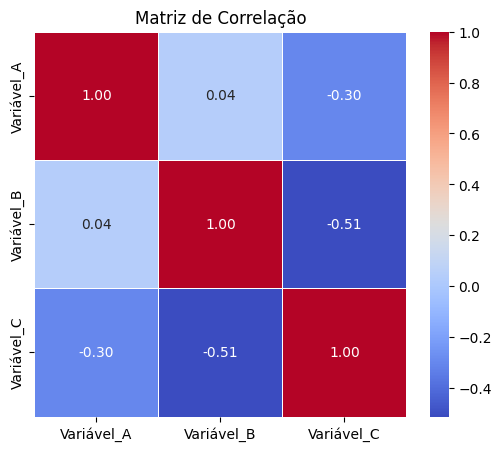

In [2]:
import pandas as pd
import numpy as np

# Criando um DataFrame fictício
np.random.seed(41)
dados = pd.DataFrame({
    "Variável_A": np.random.rand(10) * 10,  # Valores entre 0 e 10
    "Variável_B": np.random.rand(10) * 10,  # Outra variável aleatória
    "Variável_C": np.random.rand(10) * 10   # Terceira variável aleatória
})

# Calculando o Coeficiente de Correlação de Pearson entre A e B
correlacao_AB = dados["Variável_A"].corr(dados["Variável_B"])
print(f"Coeficiente de Correlação de Pearson (A e B): {correlacao_AB:.2f}")

# Calculando a Matriz de Correlação para todas as variáveis
matriz_correlacao = dados.corr()
print("\nMatriz de Correlação:")
print(matriz_correlacao)

# Visualizando a matriz de correlação com formatação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()
